In [ ]:
!pip install --upgrade scikit-learn==0.20.3

     |████████████████████████████████| 5.4 MB 26.8 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


In [ ]:
#import module
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time as time
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

**Kategorisasi**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_cleveland_upload.csv')
dataset['age']=pd.cut(dataset['age'],
                      bins = [23,29,34.3,39.6,44.9,50.2,55.4,60.7,66,71.3,76.6,81.9],
                      labels = ['29','34.3','39.6','44.9','50.2','55.4','60.7','66','71.3','76.6','81.9'])
dataset['sex']=pd.cut(dataset['sex'],
                      bins = [-1,0,1],
                      labels = ['0','1'])
dataset['cp']=pd.cut(dataset['cp'],
                      bins = [-1,0,1,2,3],
                      labels = ['0','1','2','3'])
dataset['trestbps']=pd.cut(dataset['trestbps'],
                      bins = [82.3,94,105.7,117.4,129,140.7,152.4,164.1,175.7,187.4,199.1,210.8],
                      labels = ['94','105.7','117','129','140.7','152.4','164.1','175.7','187.4','199.1','210.8'])
dataset['chol']=pd.cut(dataset['chol'],
                      bins = [77.7,126,174.3,222.5,270.8,319,367.3,415.5,463.8,608.5],
                      labels = ['126','174.3','222.5','270.8','319','367.3','415.5','463.8','608.5'])
dataset['fbs']=pd.cut(dataset['fbs'],
                      bins = [-1,0,1],
                      labels = ['0','1'])
dataset['restecg']=pd.cut(dataset['restecg'],
                      bins = [-1,0,1,2],
                      labels = ['0','1','2'])
dataset['thalach']=pd.cut(dataset['thalach'],
                      bins = [56.6,71,85.4,99.9,114.3,128.7,143.2,157.6,172,186.5,200.9,215.3],
                      labels = ['71','85.4','99.9','114.3','128.7','143.2','157.6','172','186.5','200.9','215.3'])
dataset['exang']=pd.cut(dataset['exang'],
                      bins = [-1,0,1],
                      labels = ['0','1'])
dataset['oldpeak']=pd.cut(dataset['oldpeak'],
                      bins = [-1,0.7,1.4,2,2.7,3.4,4.1,4.8,6.1,6.8],
                      labels = ['0.7','1.4','2','2.7','3.4','4.1','4.8','6.1','6.8'])
dataset['slope']=pd.cut(dataset['slope'],
                      bins = [-1,0,1,2],
                      labels = ['0','1','2'])
dataset['ca']=pd.cut(dataset['ca'],
                      bins = [-1,0,1,2,3],
                      labels = ['0','1','2','3'])
dataset['thal']=pd.cut(dataset['thal'],
                      bins = [-1,0,1,2],
                      labels = ['0','1','2'])
dataset['condition']=pd.cut(dataset['condition'],
                      bins = [-1,0,1],
                      labels = ['0','1'])
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,71.3,1,0,164.1,270.8,1,2,143.2,0,0.7,1,1,0,0
1,71.3,0,0,140.7,270.8,0,0,157.6,0,2,0,2,0,0
2,66,0,0,152.4,270.8,0,0,114.3,0,2.7,2,0,0,0
3,66,1,0,140.7,319,1,2,186.5,0,1.4,1,1,0,1
4,66,1,0,117,222.5,0,2,157.6,1,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,44.9,1,3,152.4,270.8,0,0,186.5,0,0.7,0,0,2,1
293,39.6,1,3,129,222.5,0,0,143.2,0,1.4,1,0,2,1
294,39.6,1,3,129,222.5,0,0,143.2,1,2,1,0,2,1
295,39.6,0,3,140.7,222.5,0,0,186.5,0,1.4,0,0,0,0


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy")
feature_cols =['age','cp','trestbps','restecg','exang','oldpeak','ca','thal']
X = dataset[feature_cols]  # feature vector
Y = dataset['condition']    # label vector
print(X.dtypes)

age         category
cp          category
trestbps    category
restecg     category
exang       category
oldpeak     category
ca          category
thal        category
dtype: object


In [ ]:
#split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=5)
c50_01=clf.fit(X_train, Y_train)
clf_predictions = c50_01.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, clf_predictions)*100)

Accuracy:  96.66666666666667


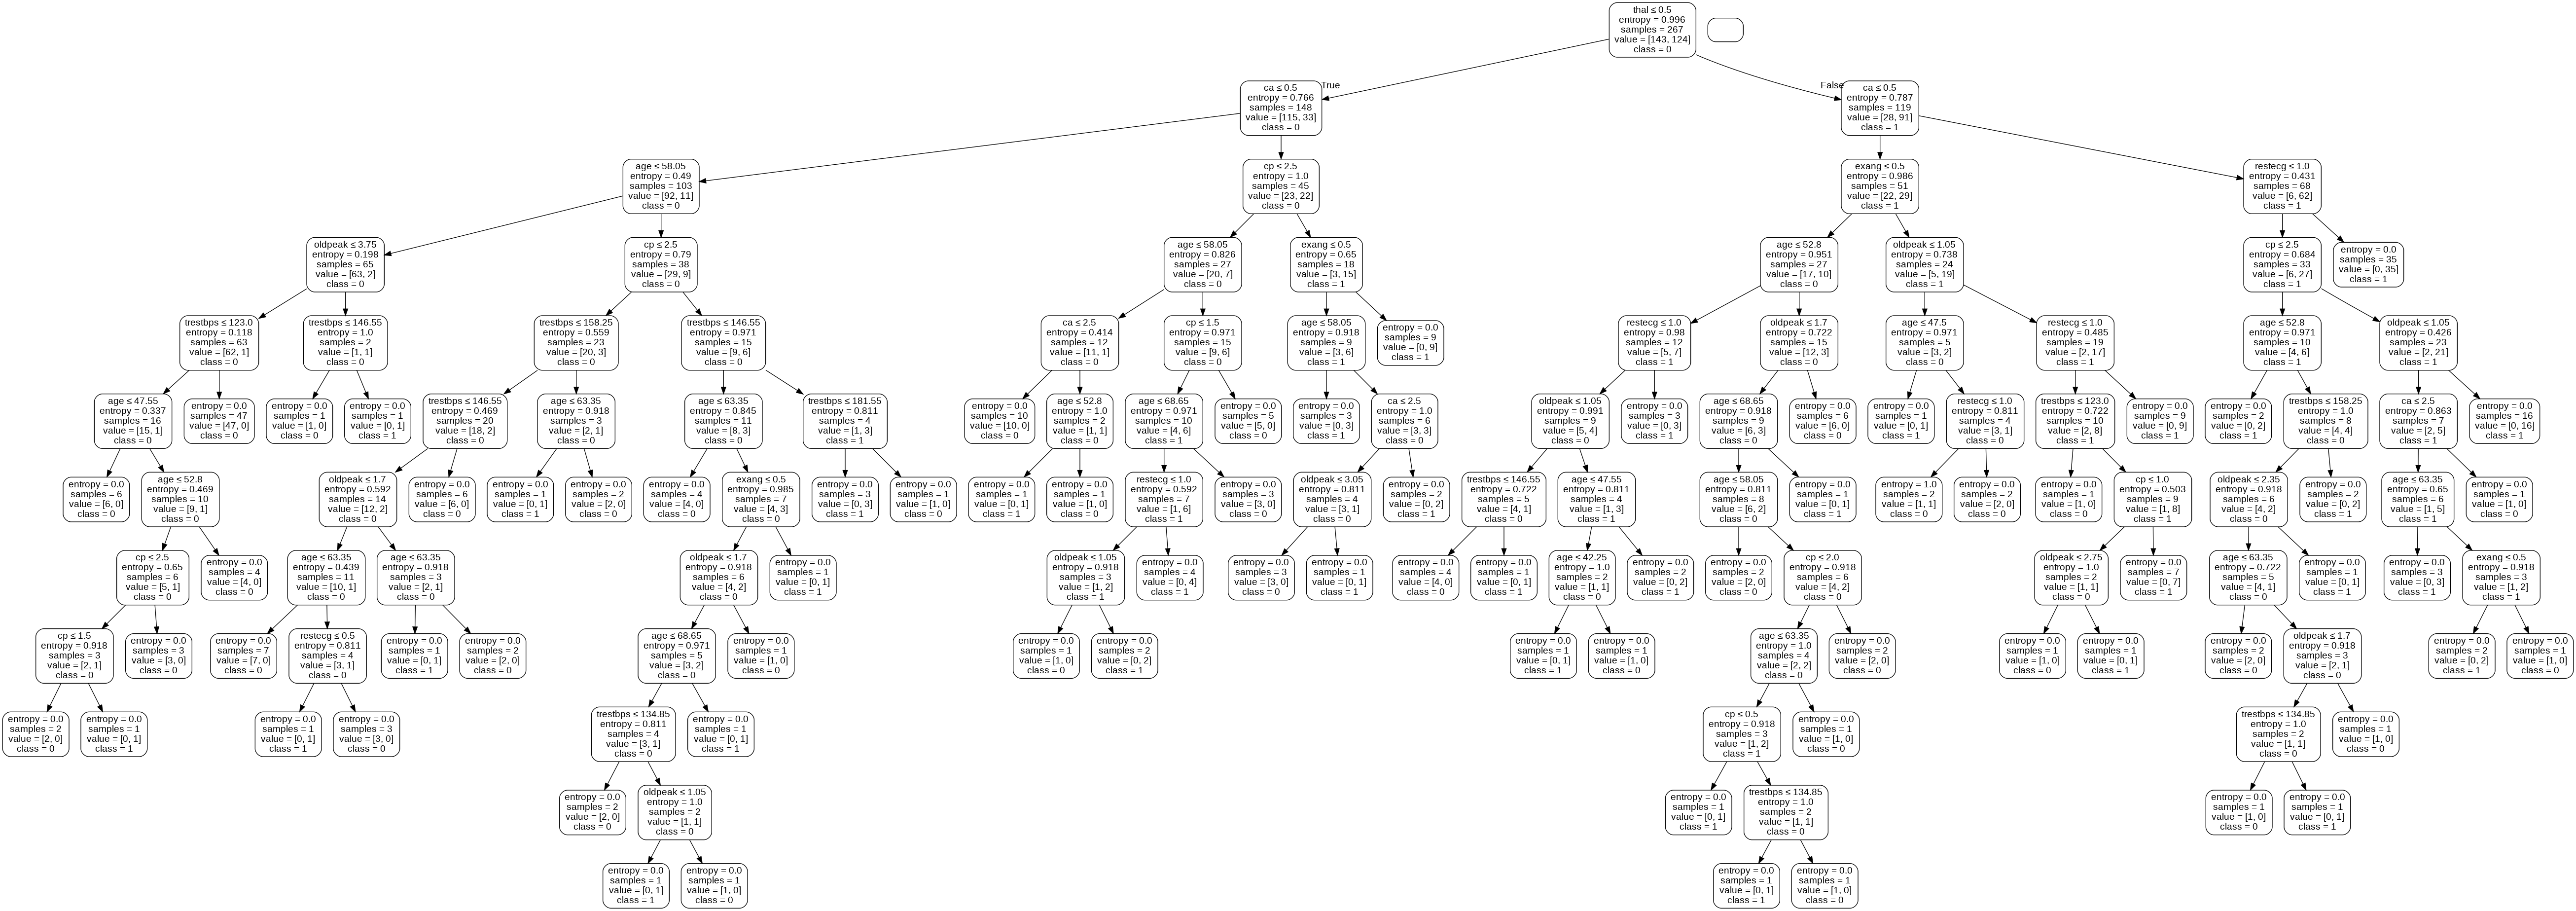

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(c50_01, out_file=dot_data,  
                filled=False, rounded=True,
                special_characters=True,feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('jantung.png')
Image(graph.create_png())

In [ ]:
print(confusion_matrix(Y_test, clf_predictions))
print(classification_report(Y_test,clf_predictions))

[[17  0]
 [ 1 12]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
c50_01.score(X_train, Y_train)

0.9962546816479401

In [ ]:
import pickle
pickle.dump(c50_01, open('model.sav', 'wb'))

In [ ]:
loaded_model = pickle.load(open('model.sav', 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.9333333333333333


In [ ]:
X_train

,age,cp,trestbps,restecg,exang,oldpeak,ca,thal
90,66,2,140.7,0,0,2,3,2
115,55.4,2,140.7,2,0,0.7,3,0
49,50.2,1,129,0,0,1.4,0,0
199,60.7,3,152.4,2,1,3.4,2,2
39,60.7,1,140.7,2,0,0.7,0,2
...,...,...,...,...,...,...,...,...
8,60.7,0,152.4,0,0,1.4,0,0
73,71.3,2,117,2,0,0.7,1,0
118,55.4,2,105.7,0,1,1.4,0,0
189,66,3,140.7,0,0,2,3,0


In [ ]:
Y_train

90     0
115    0
49     0
199    1
39     0
      ..
8      0
73     0
118    0
189    1
206    1
Name: condition, Length: 267, dtype: category
Categories (2, object): ['0' < '1']

In [ ]:
umur = 60.7
cp = 3
trestbps = 152.4
restecg = 2
exang = 1
oldpeak = 3.4
ca = 2
thal = 2

bahan = [umur,cp,trestbps,restecg,exang,oldpeak,ca,thal]
bahan = np.array([[umur,cp,trestbps,restecg,exang,oldpeak,ca,thal]])
bahan = pd.DataFrame(bahan)
bahan

,0,1,2,3,4,5,6,7
0,60.7,3.0,152.4,2.0,1.0,3.4,2.0,2.0


In [ ]:
# if bahan[0] < 23 :
#   bahan[0] = 29
# if bahan[0] > 81.9 :
#   bahan[0] = 81.0
bahan[5]=pd.cut(bahan[5],
                bins = [-1,0.7,1.4,2,2.7,3.4,4.1,4.8,6.1,6.8],
                labels = ['0.7','1.4','2','2.7','3.4','4.1','4.8','6.1','6.8'])
bahan

,0,1,2,3,4,5,6,7
0,60.7,3.0,152.4,2.0,1.0,3.4,2.0,2.0


In [ ]:
# bahan = X_train.head(1)
hasil = loaded_model.predict(bahan)
hasil = int(hasil[0])
if hasil == 0 :
  print('Tidak menderita')
else:
  print('Menderita')

print(hasil)

Menderita
1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  Parameters
